# Chronic Kidney Disease Prediction


## Contents

About Dataset
<br>
Explore data
<br>
Missing Value Analysis
<br>
Building Model


### About Dataset

#### Attribute Information

We use 24 + class = 25 ( 11 numeric ,14 nominal)
<br>
1. Age(numerical) - age in years
2. Blood Pressure(numerical) - bp in mm/Hg
3. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
4. Albumin(nominal) al - (0,1,2,3,4,5)
5. Sugar(nominal)su - (0,1,2,3,4,5)
6. Red Blood Cells(nominal)rbc - (normal,abnormal)
7. Pus Cell (nominal)pc - (normal,abnormal)
8. Pus Cell clumps(nominal)pcc - (present,notpresent)
9. Bacteria(nominal)ba - (present,notpresent)
10. Blood Glucose Random(numerical)bgr in mgs/dl
11. Blood Urea(numerical)bu in mgs/dl
12. Serum Creatinine(numerical) sc in mgs/dl
13. Sodium(numerical) sod in mEq/L
14. Potassium(numerical) pot in mEq/L
15. Hemoglobin(numerical) hemo in gms
16. Packed Cell Volume(numerical)
17. White Blood Cell Count(numerical) wc in cells/cumm
18. Red Blood Cell Count(numerical) rc in millions/cmm
19. Hypertension(nominal) htn - (yes,no)
20. Diabetes Mellitus(nominal) dm - (yes,no)
21. Coronary Artery Disease(nominal) cad - (yes,no)
22. Appetite(nominal) appet - (good,poor)
23. Pedal Edema(nominal) pe - (yes,no)
24. Anemia(nominal) ane - (yes,no)
25. Class (nominal)class - (ckd,notckd)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Explore Data

In [4]:
# Reading the dataset 
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [5]:
df.shape

(400, 26)

Dataset has 400 entries with 26 columns.
<br>
<br>
From the glimpse of the dataset we see that few columns have the value NaN which specifies that we have missing values in the data.
<Br>
<br>
Lets check the number of missing values in each column.

In [6]:
#Count total NaN at each column in DataFrame
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

We see that there is missing data in all the columns except id and classification. To handle these missing values we created a copy of the data to perfrom imputation.

In [7]:
trainingData = df.iloc[:, :].values
dataset = df.iloc[:, :].values

### Missing Value Analysis

In this dataset we have missing values in all the columns. Deleting rows with missing values is not suggestable as the dataset has only 400 entries and all the columns seem to be important in predicting chronic kidney disease.
<br>
<br>
We handle the missing values here with imputation


Replace missing values of the below columns with mean since these columns are numerical values
<br>
age
<br>
blood pressure 
<br>
Blood Glucose Random 
<br>
Blood Urea
<br>
Serum Creatinine
<br>
Sodium
<br>
Potassium
<br>
Hemoglobin
<br>
Packed Cell Volume
<br>
White Blood Cell Count
<br>
Red Blood Cell Count 

In [8]:
imputer = Imputer(missing_values="NaN", strategy="mean", axis = 0)
# Calculate the mean value considering all thr rows of the column age
imputer = imputer.fit(trainingData[:, 1:3])
#Substituting the Dataset With Calculated Values
dataset[:, 1:3] = imputer.transform(dataset[:, 1:3])

imputer = Imputer(missing_values="NaN", strategy="mean", axis = 0)
# Calculate the mean value considering all thr rows of the column age
imputer = imputer.fit(trainingData[:, 10:19])
#Substituting the Dataset With Calculated Values
dataset[:, 10:19] = imputer.transform(dataset[:, 10:19])

Replace missing values in below columns with the most frequent values 
<br>
Specific Gravity
<br>
Albumin
<br>
Sugar
<br>
Red Blood Cells
<br>
Pus Cell
<br>
Pus Cell clumps
<br>
Bacteria
<br>
Hypertension
<br>
Diabetes Mellitus
<br>
Coronary Artery Disease
<br>
Appetite
<br>
Pedal Edema
<br>
Anemia

In [9]:
imputer = SimpleImputer(strategy="most_frequent")
# Calculate the mean value considering all thr rows of the column age
imputer = imputer.fit(trainingData[:, 3:10])
#Substituting the Dataset With Calculated Values
dataset[:, 3:10] = imputer.transform(dataset[:, 3:10])

imputer = SimpleImputer(strategy="most_frequent")
# Calculate the mean value considering all thr rows of the column age
imputer = imputer.fit(trainingData[:, 19:25])
#Substituting the Dataset With Calculated Values
dataset[:, 19:25] = imputer.transform(dataset[:, 19:25])

we copy the transformed data without any missing values to new dataframe chronicData and below id the glimpse of the data

In [10]:
chronicData = pd.DataFrame(data=dataset, columns = ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'])
chronicData.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48,80,1.02,1,0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7,50,1.02,4,0,normal,normal,notpresent,notpresent,...,38,6000,4.70743,no,no,no,good,no,no,ckd
2,2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,...,31,7500,4.70743,no,yes,no,poor,no,yes,ckd
3,3,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Since we have replaced all the missing values we again check if there is any missing data in the new dataset

In [11]:
chronicData.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [12]:
# Create a list of columns with text normal and abnormal
textNormal = ["rbc","pc"]
# Create a list of columns with text present and notpresent
textPresent = ["pcc","ba"]
# Create a list of columns with text yes and no
textYes = ["htn","dm","cad","pe","ane"]

# Red Blood Cells(nominal)rbc & Pus Cell (nominal)pc  - (normal,abnormal)
for var in textNormal:
    chronicData[var] = chronicData[var].replace("normal",1)
    chronicData[var] = chronicData[var].replace("abnormal",0)

# Pus Cell clumps(nominal)pcc & Bacteria(nominal)ba - (present,notpresent)
for var in textPresent:
    chronicData[var] = chronicData[var].replace("present",1)
    chronicData[var] = chronicData[var].replace("notpresent",0)

#Hypertension(nominal) htn & Diabetes Mellitus(nominal) dm & Coronary Artery Disease(nominal) cad
#Pedal Edema(nominal) pe - (yes,no)
for var in textYes:
    chronicData[var] = chronicData[var].replace("yes",1)
    chronicData[var] = chronicData[var].replace("no",0)

#Appetite(nominal) appet - (good,poor)
chronicData["appet"] = chronicData["appet"].replace("good",1)
chronicData["appet"] = chronicData["appet"].replace("poor",0)

#Class (nominal)class - (ckd,notckd)
chronicData["classification"] = chronicData["classification"].replace("ckd",1)
chronicData["classification"] = chronicData["classification"].replace("notckd",0)
chronicData.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48,80,1.02,1,0,1,1,0,0,...,44,7800,5.2,1,1,0,1,0,0,1
1,1,7,50,1.02,4,0,1,1,0,0,...,38,6000,4.70743,0,0,0,1,0,0,1
2,2,62,80,1.01,2,3,1,1,0,0,...,31,7500,4.70743,0,1,0,0,0,1,1
3,3,48,70,1.005,4,0,1,0,1,0,...,32,6700,3.9,1,0,0,0,1,1,1
4,4,51,80,1.01,2,0,1,1,0,0,...,35,7300,4.6,0,0,0,1,0,0,1


In [13]:
chronicData.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc                int64
pc                 int64
pcc                int64
ba                 int64
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn                int64
dm                 int64
cad                int64
appet              int64
pe                 int64
ane                int64
classification     int64
dtype: object

Here we see that all the numerical data is of type int64 and categorical data is of type object. We change the datatype of numerical columns to float and categorical data to category

In [14]:
# Create a list of numerical columns 
numericalColumns = ["age","bp","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc"]
for var in numericalColumns:
    chronicData[var]=chronicData[var].astype(float)
    
# Create a list of catergorical columns
categoricalColumns = ["sg","al","su","rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane","classification"]
for var in categoricalColumns:
    chronicData[var]=chronicData[var].astype("category")
    
chronicData.dtypes

id                  object
age                float64
bp                 float64
sg                category
al                category
su                category
rbc               category
pc                category
pcc               category
ba                category
bgr                float64
bu                 float64
sc                 float64
sod                float64
pot                float64
hemo               float64
pcv                float64
wc                 float64
rc                 float64
htn               category
dm                category
cad               category
appet             category
pe                category
ane               category
classification    category
dtype: object

We delete ID from the list of predictive columns as it of no use in our prediction

In [15]:
X=chronicData.drop(['id','classification'],axis=1)
y=chronicData[["classification"]]

<b>Model Development and Prediction</b>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred=logreg.predict(X_test)

<b>Model Evaluation using Confusion Matrix</b>

In [18]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[48,  0],
       [ 2, 70]])

<b>Visualizing Confusion Matrix using Heatmap</b>

Text(0.5, 257.44, 'Predicted label')

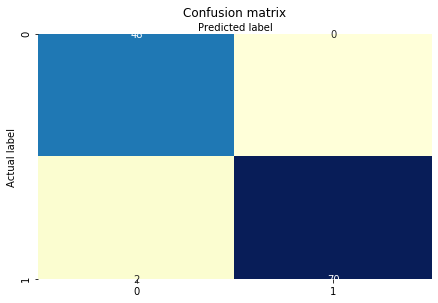

In [19]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

This matrix specifies that 118 entries are predicted correctly and 2 entries are incorrect predictions

<b>Confusion Matrix Evaluation Metrics : Compute precision, recall, F1-score and support</b>

In [20]:
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.97      0.99        72

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

Accuracy: 0.9833333333333333
Precision: 1.0
Recall: 0.9722222222222222


Here the model has an accuracy of 98% which is considered as good,
<br>
<br>
Precision specifies how accurate the model is in prediction. In this case when the logistic regression model makes predictions about people that they have chronic kidney disease, that people will have chronic kidney disease in all those cases.
<br>
<br>
If the test dataset has people suffering with chronic kidney disease then our model can identify them 97% of time.

<b>Coefficients and Intercept</b>

In [21]:
print(logreg.coef_)
print(logreg.intercept_)

[[-1.65286235e-03  9.56832805e-02  8.14343789e-02  1.76570242e+00
   4.58313823e-01 -2.63526145e-01 -1.05561451e-01  3.58785338e-02
   9.50978025e-03  5.19348987e-02  7.49978877e-03  1.19072319e+00
   9.17589470e-02 -8.74121368e-02 -9.89710393e-01 -3.17436429e-01
   1.86183758e-05 -3.31770547e-01  9.78916683e-01  9.79598973e-01
   2.60165957e-02 -5.02836090e-01  7.96423410e-01  3.42762149e-01]]
[0.09421016]


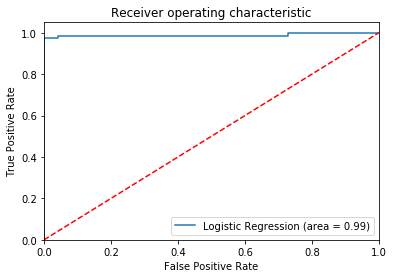

In [22]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()